In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data manipulation and research

In [2]:
train = pd.read_csv("TrainOnMe-2.csv")
test = pd.read_csv("EvaluateOnMe-2.csv")

In [3]:
for i, row in train["Unnamed: 0"].iteritems():
    try:
        row = int(row)
    except:
        print(i, row)

134 https://youtu.be/74TDvzZcHPw
581 Det är då som det stora vemodet rullar in
582 Och från havet blåser en isande
803 Den här är felt. Darfor erase it.


In [4]:
train = train.drop("Unnamed: 0", axis = 1)

In [5]:
train.shape

(1004, 14)

In [6]:
train[train.isnull().any(axis=1)].shape

(8, 14)

In [7]:
train["y"].value_counts(dropna=False)

Jorg              343
Shoogee           290
Bob               268
Atsuto             95
NaN                 7
 gråkall vind.      1
Name: y, dtype: int64

In [8]:
train.dropna(inplace=True)

In [9]:
train.iloc[262:265]

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
263,Shoogee,0.66785,0.08633,-2.12534,-9.13844,10.69676,0.04275,Jerry Fernström,0.16830,-0.30892,-7.63603,-2.05398,False,32.32980
264,Bob,1.01414,0.69946,-3.43084,-9.13306,10.63000,0.74978,Jerry Fernström,2.32421,-0.31321,-8.66807,-1.54988,False,48.99139
265,Jorg,0.88362,0.12864,-4.91248,-9.41917,10.04934,https://youtu.be/0q_Bbd2SGtY,Jerry Fernström,0.60795,2.31590,-5.25392,-1.40652,False,41.72493


In [10]:
train.drop(265, inplace= True)

In [11]:
train.shape

(995, 14)

In [12]:
train = train.astype({"x6": float})

In [13]:
encoder = dict()
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

for column in train.columns:
    if train[column].dtype == "object":
        train[column + "enc"] = labelencoder.fit_transform(train[column])
        encoder[column] = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))

In [14]:
train

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,yenc,x7enc,x12enc
0,Shoogee,2.20274,-0.04690,-4.69816,-9.07800,10.13118,-0.08900,Erik Sven Williams,0.54191,0.52041,-5.66990,-0.93831,False,107.78776,3,1,0
1,Bob,2.01516,-0.12177,-4.24286,-9.79772,9.98259,-0.01485,Erik Sven Williams,-1.21671,1.18749,-9.25300,-1.21892,False,98.63633,1,1,0
2,Bob,0.02598,-0.24764,0.39977,-9.54167,10.53391,-0.27978,Erik Sven Williams,-2.39764,1.95167,-9.46447,-2.68910,True,1.49880,1,1,1
3,Jorg,0.39778,-0.83343,-2.14272,-9.06550,10.15047,-0.84583,Jerry från Solna,0.09768,0.92010,-11.17952,0.59877,False,18.81785,2,4,0
4,Jorg,1.25346,0.09320,1.54063,-9.33171,9.92016,0.09889,Jerry Fernström,-0.46134,0.16381,-12.07755,1.09106,True,63.44326,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,Shoogee,2.96657,0.44602,-6.39121,-8.92726,10.59103,0.38746,Jerry Fernström,0.69268,-0.58989,-10.53091,0.20014,False,145.13294,3,2,0
1000,Shoogee,0.20434,-0.67408,-4.12029,-9.00304,10.36168,-0.60313,Erik Sven Williams,0.22119,-1.57906,-9.80819,-2.42307,False,8.15681,3,1,0
1001,Jorg,0.72078,0.74335,-0.63288,-8.94255,10.07998,0.82252,Jerry Fernström,1.49456,2.23215,-7.26243,0.69045,True,35.72234,2,2,1
1002,Jorg,0.34186,0.10278,-0.39189,-9.05518,9.98665,0.04969,Jerry Fernström,-0.25843,0.24975,-9.88372,0.47915,False,16.89682,2,2,0


In [15]:
trainM = train[["x1","x2","x3","x4","x5","x6", "x8","x9","x10","x11","x13","yenc","x7enc","x12enc"]]

In [16]:
trainY,trainX = trainM["yenc"], trainM.drop("yenc", axis=1)
trainY.shape, trainX.shape

((995,), (995, 13))

In [17]:
train.head(1)

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,yenc,x7enc,x12enc
0,Shoogee,2.20274,-0.0469,-4.69816,-9.078,10.13118,-0.089,Erik Sven Williams,0.54191,0.52041,-5.6699,-0.93831,False,107.78776,3,1,0


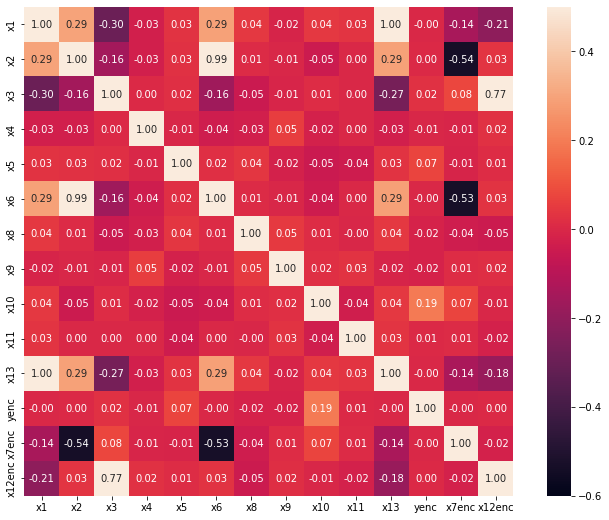

In [18]:
corrmat = trainM.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmin = -0.6 ,vmax=0.5, annot=True, square=True, fmt='.2f');

## Model making

In [19]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(trainX.to_numpy(), trainY.to_numpy(), test_size=0.25)
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((746, 13), (249, 13), (746,), (249,))

In [22]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(train_X, train_y, verbose=False)

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ['dlopen(/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


In [9]:
evals = pd.read_csv("result/EvaluationGT-2.csv", header=None)

In [12]:
result = pd.read_csv("result/result.txt", header = None)

In [14]:
result.to_numpy()

array([['Jorg'],
       ['Jorg'],
       ['Jorg'],
       ...,
       ['Jorg'],
       ['Bob'],
       ['Atsuto']], dtype=object)

In [11]:
evals.to_numpy()

array([['Shoogee'],
       ['Bob'],
       ['Jorg'],
       ...,
       ['Jorg'],
       ['Jorg'],
       ['Jorg']], dtype=object)

In [15]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(evals.to_numpy(, pred)